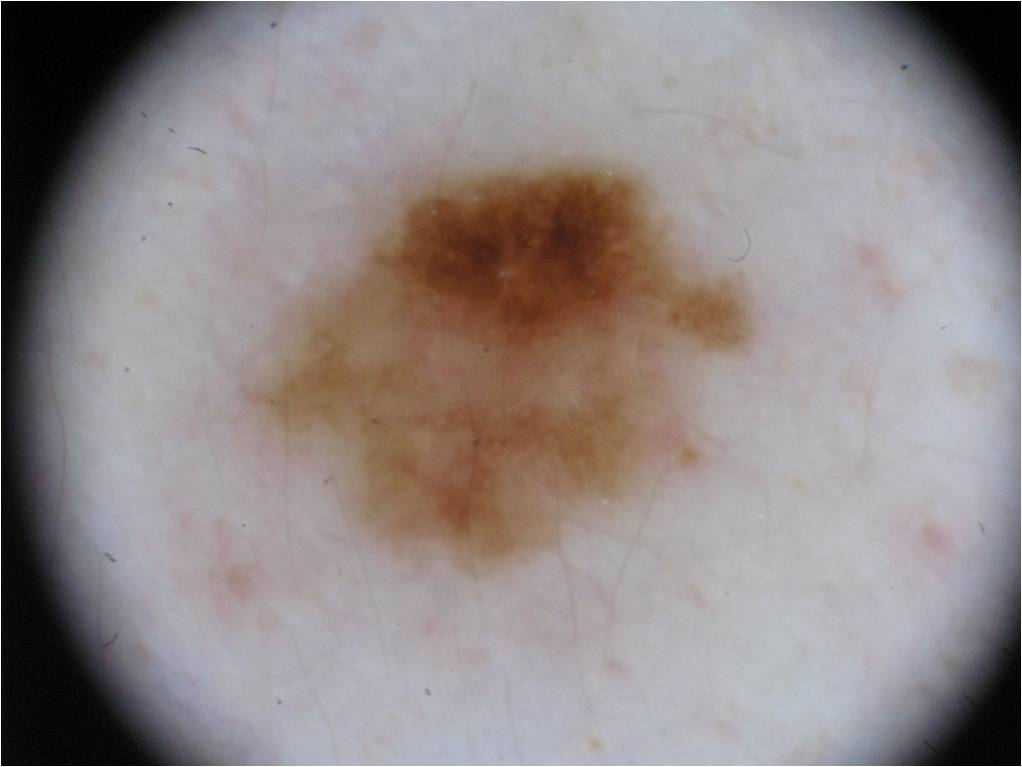

In [1]:
from PIL import Image, ImageFilter, ImageOps, ImageDraw, ImageStat
from preprocessor import Preprocessor
import numpy as np

img = Image.open(f'./data_preview/raw_img/ISIC_0000011.jpg')
prep_img = Preprocessor(img)
img

## 1. Reduce dimensions, convert to grayscale

In [2]:
prep_img.convert_to_grayscale()
prep_img.img.mode

'L'

## 2. Contrast enchancement

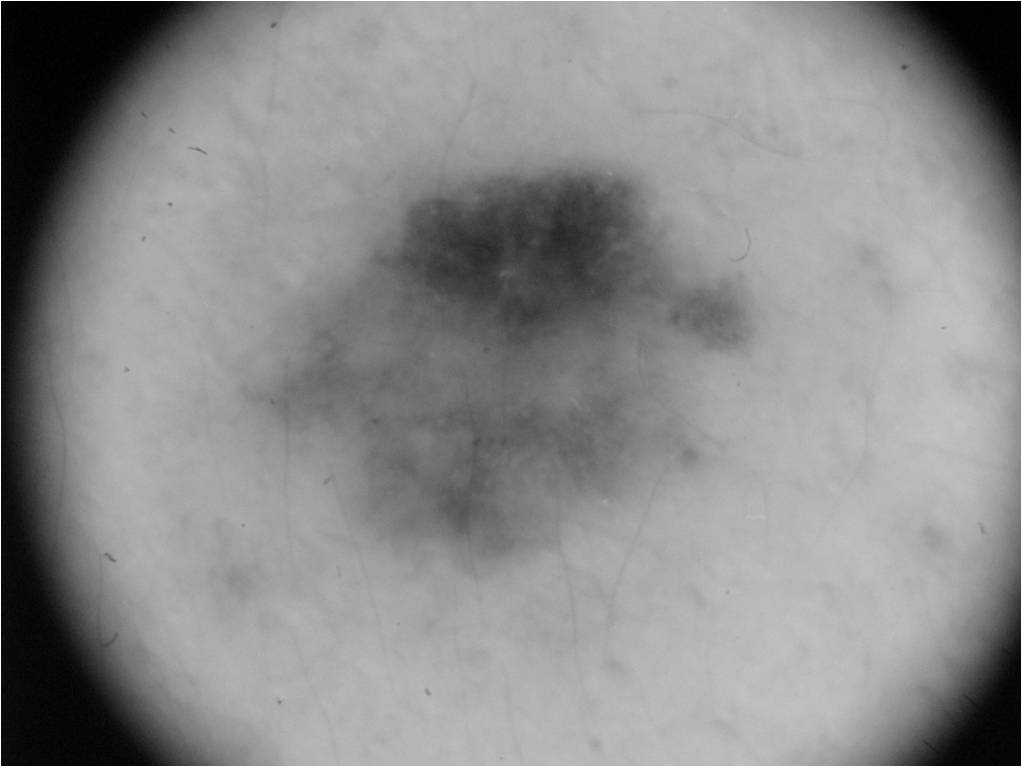

In [3]:
prep_img.enchance_contrast()
prep_img.img

## 3. Hair removal

In [ ]:
# im_edges = prep_img.img.filter(ImageFilter.FIND_EDGES)
# blurred = prep_img.img.filter(ImageFilter.GaussianBlur(radius=5))
# prep_img.img.paste(blurred, mask=im_edges)
# prep_img.img
# mask = im_edges.copy()
# #mask = mask.point(lambda x: x > np.average(mask)*5 and 255)
# prep_img.img.paste(im=im_edges, box=(0,0), mask=mask)
# mask

## 4. Vignette effect removal

inner: 141.28022165123983 
outer:137.3090612007534
-------
inner: 142.21677230385095 
outer:136.52681856307888
-------
inner: 143.11008413146632 
outer:135.69697341290387
-------
inner: 143.96789750254266 
outer:134.8105202435836
-------
inner: 144.80059185878764 
outer:133.8536564423031
-------
inner: 145.6053256896864 
outer:132.82539670882232
-------
inner: 146.39160415598937 
outer:131.70939528097801
-------
inner: 147.1540788083136 
outer:130.50410398132766
-------
inner: 147.8892692667218 
outer:129.20470875442413
-------
inner: 148.6046913533226 
outer:127.79127334502532
-------


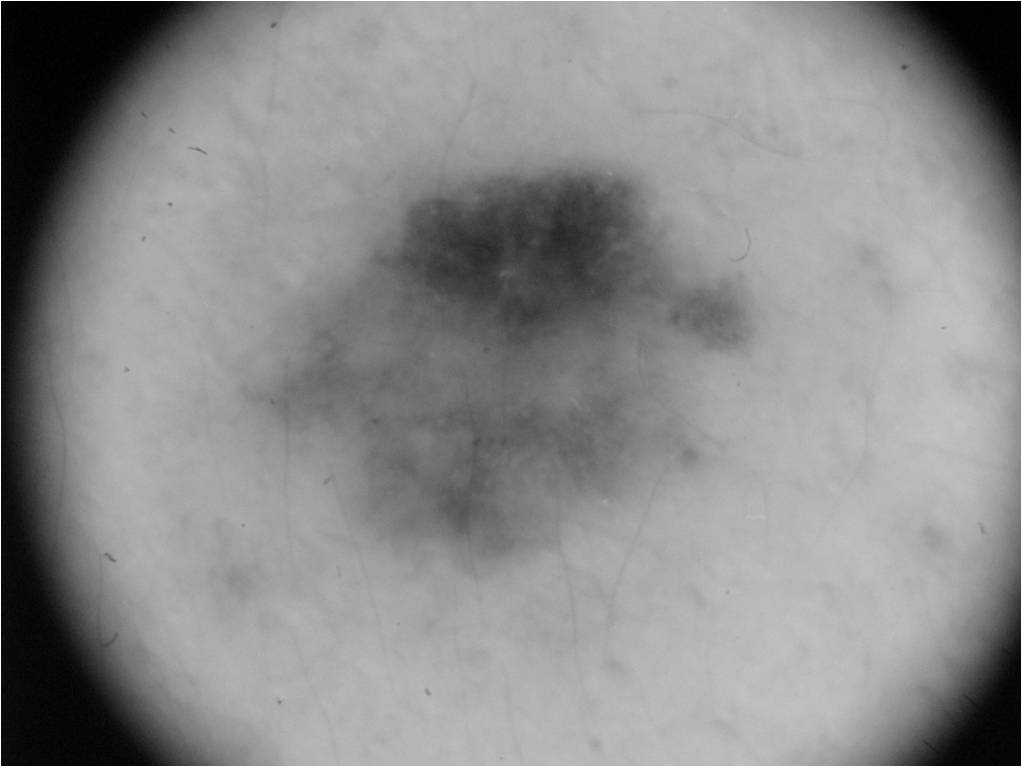

In [4]:
prep_img.remove_vignette()
prep_img.img

 ## 5. Resize

In [ ]:
prep_img.resize()
prep_img.img.size

## 6. Add border

In [ ]:
prep_img.add_border()

## Overview and save

In [ ]:
prep_img.save("test_autopreproc.png", path='./data_preview/temp/')
prep_img.img

## Leftovers

Iteration: 0
inner: 141.28022165123983 
outer:137.3090612007534
-------
Iteration: 1
inner: 143.11008413146632 
outer:135.69697341290387
-------
Iteration: 2
inner: 144.80059185878764 
outer:133.8536564423031
-------
Iteration: 3
inner: 146.39160415598937 
outer:131.70939528097801
-------
Iteration: 4
inner: 147.8892692667218 
outer:129.20470875442413
-------
Iteration: 5
inner: 149.29904643199689 
outer:126.25788684730519
-------
Iteration: 6
inner: 150.63178253706755 
outer:122.75636593797167
-------
Iteration: 7
inner: 151.85984841353024 
outer:118.76274345049907
-------
Iteration: 8
inner: 152.8916178860648 
outer:114.5165039614422
-------
Iteration: 9
inner: 153.77295711487082 
outer:109.87069724223115
-------


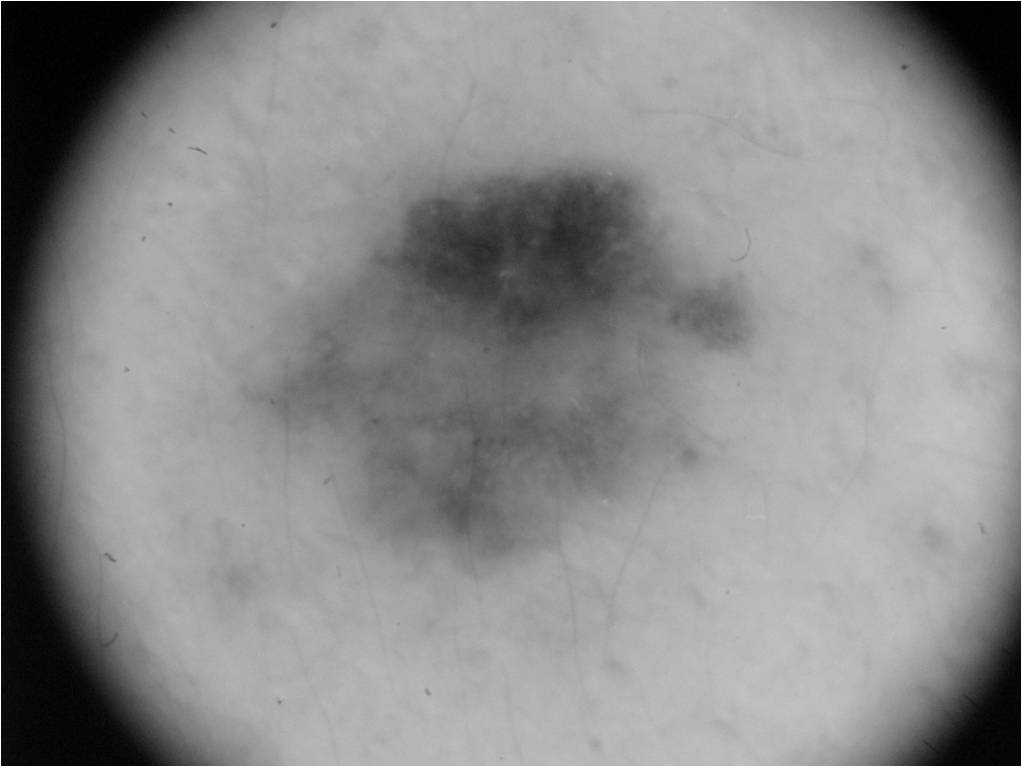

In [10]:
source_image = prep_img.img.copy()
#source_image = source_image.crop(box= (20,20, 492, 492) )

height = source_image.size[0]
width = source_image.size[1]
center = (width/2, height/2)

for iteration in range(15):
    print(f"Iteration: {iteration}")
    radius = height / 3 - 20 + iteration * 10

    #Create circular mask
    Y, X = np.ogrid[:width, :height]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y-center[0])**2)
    arr_mask = (dist_from_center <= radius)*255
    
    #Apply mask to source image 
    im_mask = Image.fromarray(arr_mask).convert('L')
    masked_img = Image.composite(source_image, im_mask, mask=im_mask)
    masked_img.show()
    #Get mean pixel values of inner and outer circle
    mean_inner = ImageStat.Stat(source_image, mask=im_mask).mean[0]
    mean_outer = ImageStat.Stat(source_image, mask=ImageOps.invert(im_mask)).mean[0]
    print(f'inner: {mean_inner} \nouter:{mean_outer}\n-------')

    #Check if vignette effect is in the image
    if mean_outer < 25.0:
        inner_fill = np.full((width, height), int(mean_inner))
        inner_fill = Image.fromarray(inner_fill).convert('L')

        corrected_img = Image.composite(source_image, inner_fill,mask=im_mask)
        source_image.paste(corrected_img)
        break 

source_image
